## Problem Statement

According to estimates, 17.9 million people die from cardiovascular diseases (CVDs) each year, which accounts for 31% of all fatalities worldwide. Heart attacks and strokes account for four out of every five CVD fatalities, with premature deaths accounting for one-third of these deaths among those under the age of 70. This dataset comprises 11 variables that can be used to predict a potential heart illness. Heart failure is a common occurrence brought on by CVDs.

### Data description

### Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
# Loading the data and checking the first five observation of dataset

df=pd.read_csv('heart_data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# checking the shape of train data
df.shape

(918, 12)

There are total 918 rows and 12 columns.

In [4]:
# To get overall information about dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


1. There are total 918 rows and 12 columns.
2. dtypes of cols: float64(1), int64(6), object(5)


In [5]:
# statistical description of the data.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### Handling Missing Values


In [6]:
Total=df.isnull().sum()
percent = (df.isnull().sum()/len(df))*100
missing_values=pd.concat([Total,percent],axis=1,keys=["Total","percentage"])
missing_values

,Total,percentage
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


There is no null values in this dataset.


In [7]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

We can see the number of unique values for each column.

In [8]:
df.shape

(918, 12)

#### removing duplicates from this dataset

In [9]:
df.drop_duplicates(keep="first",inplace=True)

In [10]:
df.shape

(918, 12)

There were no duplicates in this dataset, as we can see that the shape of the dataset after removing duplicates is same as before.

### EDA

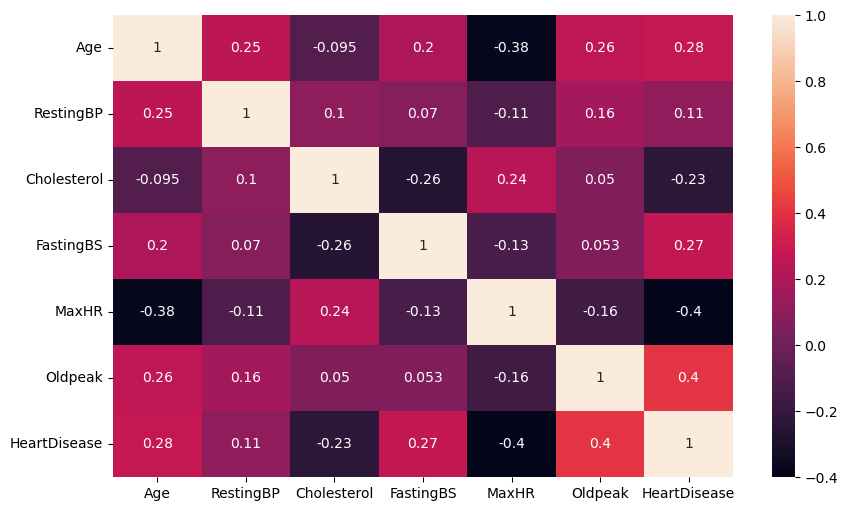

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

Here we can see Heart Disease has a negative correlation with "MaxHR" and "Cholesterol" 
And have positive correatlation with "Oldpeak","FastingBS" and "RestingBP".



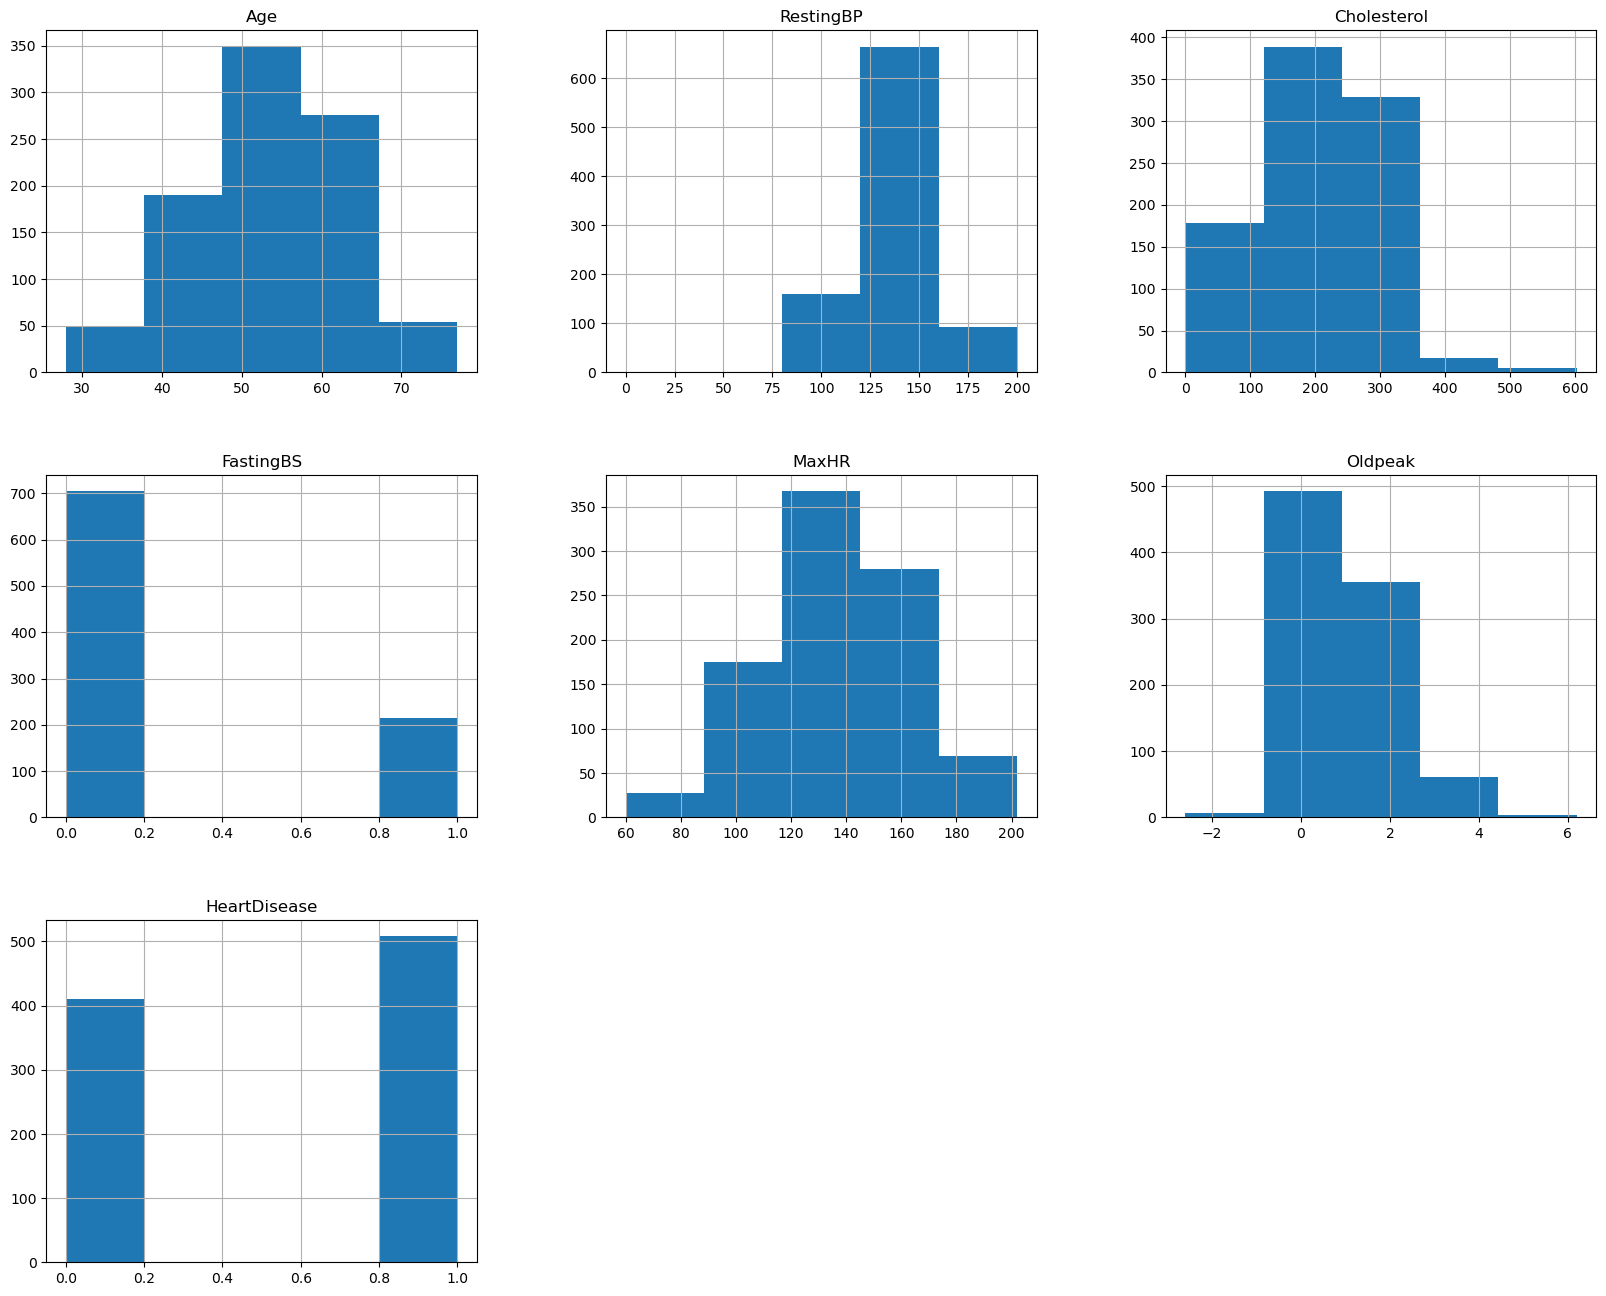

In [12]:
df.hist(figsize=(20,16),bins=5)
plt.show()

The distribution of data is shown in the above plot we can observe that if persons's age is more than 40 Heart failure is more likely to happen to those people.

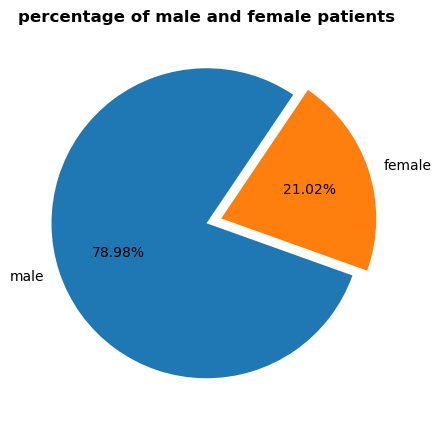

In [13]:
plt.figure(figsize=(5,7))
plt.title("percentage of male and female patients",fontweight="bold")
values = df["Sex"].value_counts()
plt.pie(values, labels=["male","female"], explode=(0,0.1), autopct="%.2f%%", startangle=56)
plt.show()


As we can clearly see, only 21.02% of the heart failure patients are female in our observation. This means that we have more number of male patients when compared to females in the dataset. 

In [14]:
num_cols=df.select_dtypes(include=np.number).columns
num_cols

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

- All the numeric columns are in num_cols.

In [15]:
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

- All the object columns are in cat_cols.


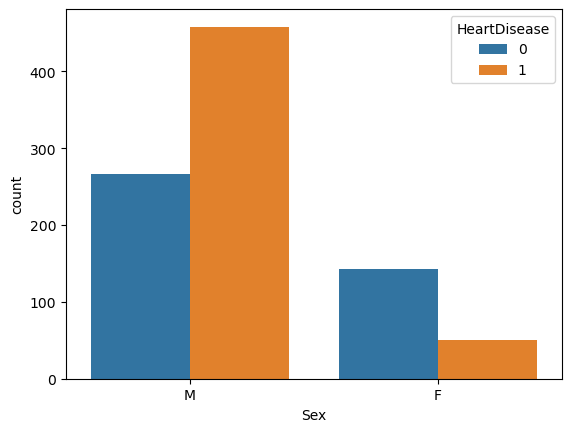

In [16]:
sns.countplot(data=df,x="Sex",hue="HeartDisease")
plt.show()
    

As compared to females more number of males are suffering from heart disease.

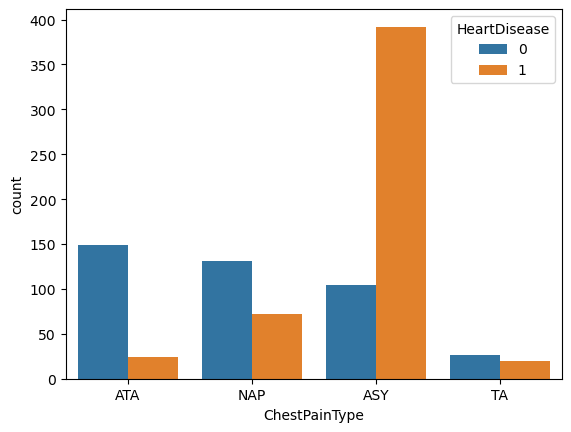

In [17]:
sns.countplot(data=df,x="ChestPainType",hue="HeartDisease")
plt.show()
    

There are four types of chest pain, There is a high chances of having heart disease if people are suffering because of ASY chest pain and comparatively very low chances of having heart disease if people having ATA chest pain type.

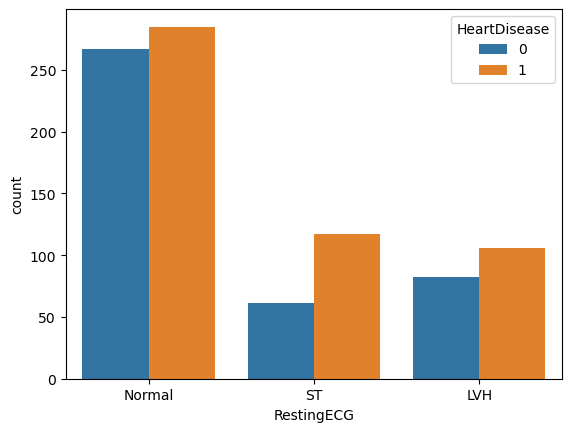

In [18]:
sns.countplot(data=df,x="RestingECG",hue="HeartDisease")
plt.show()
    

Three types of Resting electrocardiographic results are there.


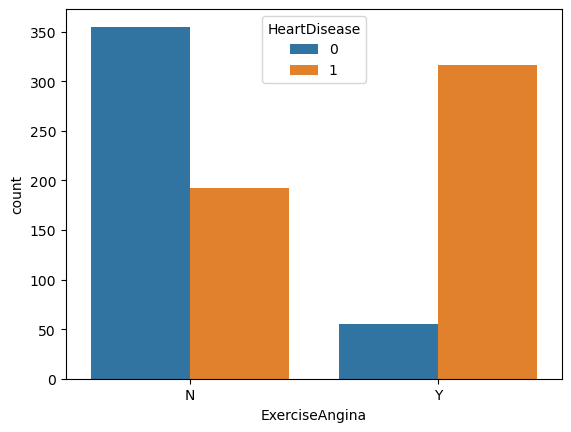

In [19]:
sns.countplot(data=df,x="ExerciseAngina",hue="HeartDisease")
plt.show()
    

1. Angina is pain in the chest that comes on with exercise, stress, or other things that make the heart work harder.
2. We can observe that people with Exercise Angina is more likely to have heart problem.

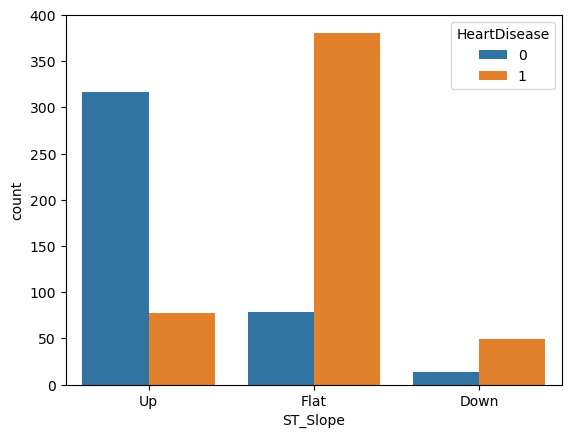

In [20]:
sns.countplot(data=df,x="ST_Slope",hue="HeartDisease")
plt.show()
    

The category of People with flat st_slope are in more complex situation than the others. As in ST_slope flat category there is more number of heart patients.

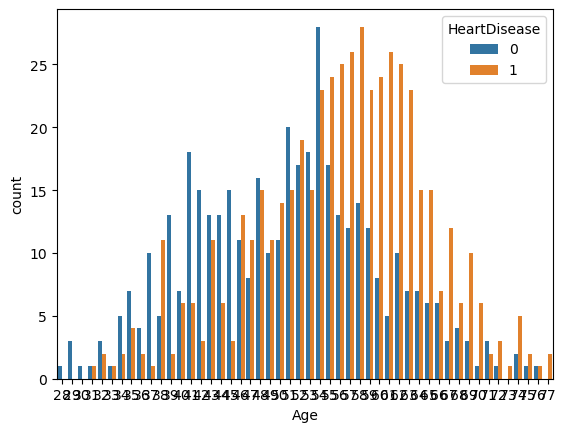

In [21]:
sns.countplot(data=df,x="Age",hue="HeartDisease")
plt.show()

Most of heart disease Patients have age between 55 and 65

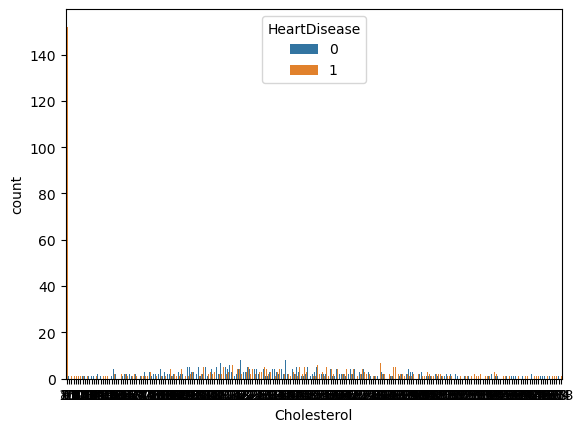

In [22]:
sns.countplot(data=df,x="Cholesterol",hue="HeartDisease")
plt.show()

Cholesterol seem to be higher in females and people with low fasting blood sugar, though the difference looks small.


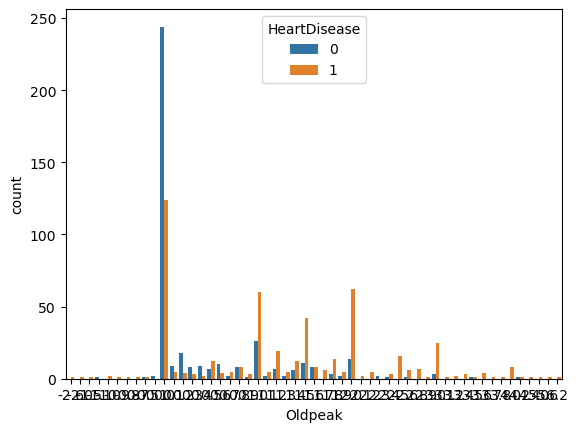

In [23]:
sns.countplot(data=df,x="Oldpeak",hue="HeartDisease")
plt.show()

Most patients with 0 oldpeak, don't have Heart disease

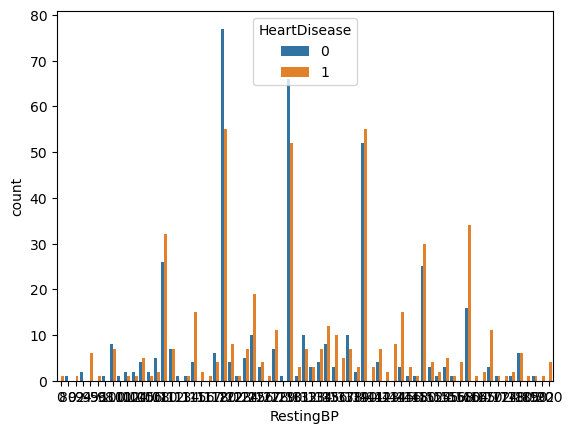

In [24]:
sns.countplot(data=df,x="RestingBP",hue="HeartDisease")
plt.show()

Most tested Patients have RestingBP between 120 and 150

#### Outliers

In [25]:
#check for outliers in each columns of our dataset

def plot_boxplot(df,cols):
    df.boxplot(column=[cols])
    plt.grid(False)
    plt.show()

- We are plotting only those columns which contain outliers.

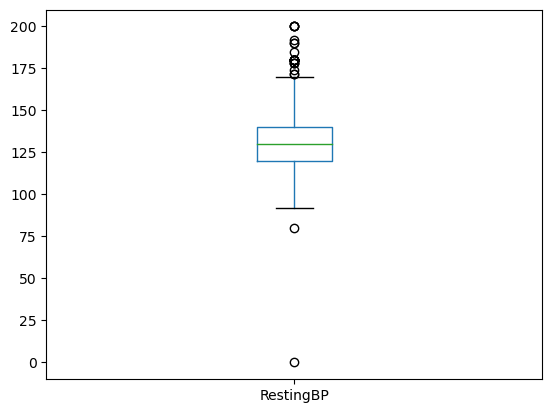

In [26]:
plot_boxplot(df, "RestingBP")

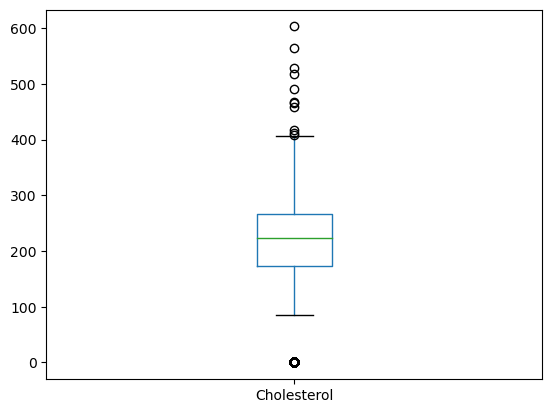

In [27]:
plot_boxplot(df,"Cholesterol")

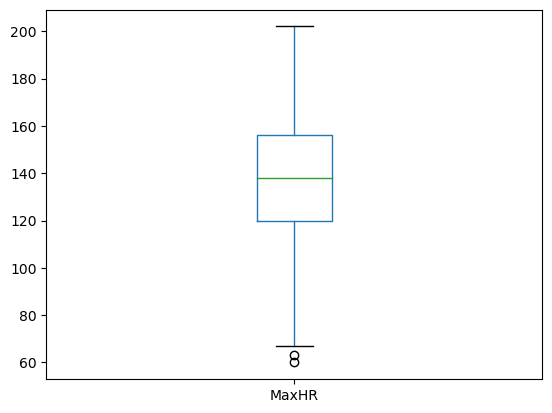

In [28]:
plot_boxplot(df,"MaxHR")

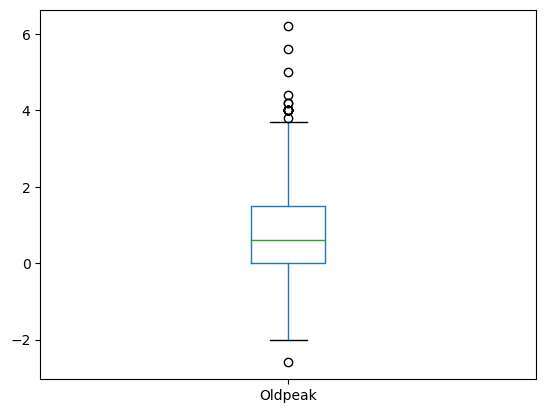

In [29]:
plot_boxplot(df,"Oldpeak")

The presence of outliers in above plots but we are not going to remove this outlers as we do not have the domain knowledge about this dataset at this stage.

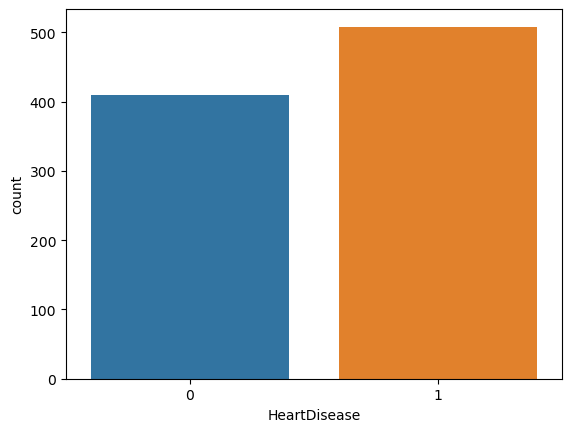

In [30]:
sns.countplot(data=df,x="HeartDisease")
plt.show()

1. We can see the distribution of target in the above plot.
2. The target here is balanced.
3. As we can see in the above plot there are only two categories,so it is a binary classification problem

### Splitting train and test data

In [31]:
x=df.drop(["HeartDisease"],axis=1)
y=df["HeartDisease"]

In [32]:
x.shape

(918, 11)

In [33]:
y.shape

(918,)

###  Data preprocessing


In [34]:
# Data encoding
# applying OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]=oe.fit_transform(x[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']])

### Train test split

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [38]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)

print('X_test :',X_test.shape)
print('y_test :',y_test.shape)

X_train : (734, 11)
y_train : (734,)
X_test : (184, 11)
y_test : (184,)


### Model building without using Scikit-learn

In [39]:
import numpy as np

class Node:
    
    def __init__(self, feature=None, threshold=None, chi2=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.chi2 = chi2
        self.left = left
        self.right = right
        self.value = value

In [40]:
class DecisionTree:
    
    def __init__(self, alpha=0.05, min_samples=3,max_depth=5):
        self.alpha = alpha
        self.min_samples = min_samples
        self.max_depth = max_depth
        self.tree = None
    
    def fit(self, X, y):
       
        self.tree = self._build_tree(X, y)
    
    
    def predict(self, X):
        y_pred = np.apply_along_axis(lambda x: self._traverse_tree(self.tree, x), 1, X)
        return y_pred

    def _traverse_tree(self, node, x):
        if node.feature is None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(node.left, x)
        else:
            return self._traverse_tree(node.right, x)
    
    def _build_tree(self, X, y):
        if X.shape[0] <= self.min_samples:
            return Node(value=self._get_leaf_value(y))
        
        # Split the data into two branches
        best_feature, best_threshold, best_chi2 = self._get_best_split(X, y)
        if best_feature is None:
            return Node(value=self._get_leaf_value(y))
        
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        left_tree = self._build_tree(X[left_mask], y[left_mask])
        right_tree = self._build_tree(X[right_mask], y[right_mask])
        
        return Node(feature=best_feature, threshold=best_threshold, chi2=best_chi2, left=left_tree, right=right_tree)
    
    def _get_best_split(self, X, y):
        best = (None, None, 0)
        thresholds_func = lambda sorted_X: (sorted_X[1:] + sorted_X[:-1]) / 2
    
        for feature in range(X.shape[1]):
            sorted_X = np.sort(X[:, feature])
            thresholds = thresholds_func(sorted_X)
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                if left_mask.sum() < self.min_samples or right_mask.sum() < self.min_samples:
                    continue
                chi2 = self._get_chi2(y, left_mask, right_mask)
                if chi2 > best[2]:
                    best = (feature, threshold, chi2)
    
        return best if best[0] is not None else (None, None, None)


    def _get_chi2(self, y, left_mask, right_mask):
        observed = np.array([
            [np.sum(y[left_mask] == 0), np.sum(y[left_mask] == 1)],
            [np.sum(y[right_mask] == 0), np.sum(y[right_mask] == 1)]
        ])
        expected = np.array([
            [np.sum(left_mask) * np.sum(y == 0), np.sum(left_mask) * np.sum(y == 1)],
            [np.sum(right_mask) * np.sum(y == 0), np.sum(right_mask) * np.sum(y == 1)]
        ]) / y.shape[0]
        chi2 = np.sum((observed - expected) ** 2 / expected)
        return chi2
    
    def _get_leaf_value(self, y):
        return np.bincount(y).argmax()


In [41]:
classifier = DecisionTree()

In [42]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [43]:
import time
# record start time
start_time = time.time()

In [44]:
X_train_array = X_train.to_numpy()
classifier.fit(X_train_array, y_train)

In [45]:
# record end time
end_time = time.time()

# calculate the time taken to fit the model
time_taken = end_time - start_time

# print the time taken
print("Time taken to run the code: {:.2f} seconds".format(time_taken))

Time taken to run the code: 75.53 seconds


In [46]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

### Evaluation metrics

In [47]:
# Calculate TP, FP, FN, TN
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TN = np.sum((y_test == 0) & (y_pred == 0))

# Create confusion matrix
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(confusion_matrix)

# Calculate accuracy, recall, precision, and F-score
accuracy= (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
fscore = 2 * (precision * recall) / (precision + recall)

print("Accuracy",accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", fscore) 

[[88 12]
 [22 62]]
Accuracy 0.8152173913043478
Recall: 0.8
Precision: 0.88
F-score: 0.8380952380952381


### Model building Using Scikit-learn

In [48]:
import time
# record start time
start_time = time.time()

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
dt_pred = classifier.predict(X_test)
dt_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,dt_pred))

[[62 12]
 [22 88]]


### Evaluation metrics

In [53]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.78        74
           1       0.88      0.80      0.84       110

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



In [54]:
# record end time
end_time = time.time()

# calculate the time taken to fit the model
time_taken = end_time - start_time

# print the time taken
print("Time taken to run the code: {:.2f} seconds".format(time_taken))

Time taken to run the code: 0.25 seconds


### Comparision

In [1]:
code1 = [75.53, "81.52 %","80%","83%","83.80%"]
df1 = pd.DataFrame({'without using sklearn ': code1})

code2 = [0.25, "82 %","81%","82%","81%"]
df2 = pd.DataFrame({'With sklearn': code2})


result = ['Time stamp', 'Accuracy','Recall','Precision','F1 Score']
df3 = pd.DataFrame({'Column': result})


# display the results in a table
df_r = pd.concat([df3, df1, df2], axis=1)

print("\n")
print(df_r)



       Column without using sklearn  With sklearn
0  Time stamp                  75.53         0.25
1    Accuracy                81.52 %         82 %
2      Recall                    80%          81%
3   Precision                    83%          82%
4    F1 Score                 83.80%          81%


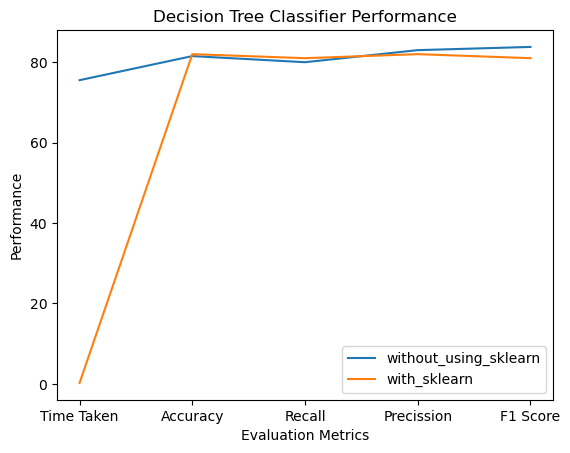

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for each scenario
without_using_sklearn = [75.53, 81.52,80,83,83.80]
with_sklearn = [0.25, 82 ,81,82,81]


# Define the labels for each performance measure
labels = ['Time Taken', 'Accuracy','Recall','Precission', 'F1 Score']

# Define the x-axis ticks
x = np.arange(len(labels))

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the lines for each scenario
ax.plot(x, without_using_sklearn, label='without_using_sklearn')
ax.plot(x, with_sklearn, label='with_sklearn')


# Add labels, title, and legend
ax.set_xlabel('Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Performance')
ax.set_title('Decision Tree Classifier Performance')
ax.legend()

# Show the plot
plt.show()